<a href="https://colab.research.google.com/github/Suryaanugrah2001/EDA-Analisis-Sentimen-Aplikasi-Threads/blob/main/knn_threads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from tqdm.notebook import tqdm

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
from google.colab import files
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/threads_reviews.csv")
df.head()

,source,review_description,rating,review_date
0,Google Play,Very good app for Android phone and me,5,27-08-2023 10:31
1,Google Play,Sl👍👍👍👍,5,27-08-2023 10:28
2,Google Play,Best app,5,27-08-2023 9:47
3,Google Play,Gatiya app,1,27-08-2023 9:13
4,Google Play,Lit bruv,5,27-08-2023 9:00


In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
# Sentiment analysis using VADER
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [6]:
# run polarity_scores on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_description']
    index = row['review_date']
    result[index] = sia.polarity_scores(text)

  0%|          | 0/40435 [00:00<?, ?it/s]

In [7]:
# Gabungkan skor sentimen dengan kerangka data
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'review_date'})
vaders = vaders.merge(df, how='right')

In [8]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# Bersihkan dan proses awal data teks
corpus = []
for i in range(len(vaders)):
    review = re.sub(pattern='[^a-zA-Z]', repl='', string=vaders['review_description'][i])
    review = review.lower()

    review_word = review.split()
    review_word = [word for word in review_word if not word in set(stopwords.words('english'))]

    porstem = PorterStemmer()
    review = [porstem.stem(word) for word in review_word]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
# Ubah data teks menjadi fitur numerik menggunakan CountVectorizer
vectorizer = CountVectorizer(max_features=1500)
X = vectorizer.fit_transform(corpus).toarray()

In [11]:
# membuat fungsi untuk mengklasifikasikan sentimen menjadi positif, netral, dan negatif
def sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positif'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'netral'
    else:
        return 'negatif'

vaders['sentiment'] = vaders.compound.apply(sentiment)

In [12]:
# Tentukan variabel target
y = vaders['sentiment']

# Pisahkan kumpulan data menjadi data latih dan data uji, latih 80 pengujian 20( ini bisa diganti ganti pembagian datanya untuk mempengaruhi akurasi model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Latih pengklasifikasi KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [14]:
# Buatlah prediksi pada set tes
y_pred = knn_classifier.predict(X_test)

In [15]:
# Evaluasi kinerja pengklasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     negatif       0.46      0.10      0.16      1607
      netral       0.41      0.08      0.14      2520
     positif       0.50      0.91      0.65      3960

    accuracy                           0.49      8087
   macro avg       0.46      0.36      0.32      8087
weighted avg       0.46      0.49      0.39      8087

Accuracy Score: 0.49239520217633237




* ** Precision (presisi):**
Precision untuk kelas 'negatif': 0.46
Precision untuk kelas 'netral': 0.41
Precision untuk kelas 'positif': 0.50
Precision mengukur sejauh mana prediksi positif yang dibuat oleh model benar-benar positif. Dalam konteks ini, misalnya, dari semua prediksi yang dilakukan untuk kelas 'negatif', hanya 46% yang sebenarnya benar-benar 'negatif'.

*    ** Recall (sensitivitas atau recall):**

Recall untuk kelas 'negatif': 0.10
Recall untuk kelas 'netral': 0.08
Recall untuk kelas 'positif': 0.91
Recall mengukur sejauh mana model dapat mengidentifikasi semua instance yang sebenarnya positif dari keseluruhan data yang positif. Sebagai contoh, recall untuk kelas 'positif' adalah 0.91, yang berarti model dapat mengidentifikasi 91% dari semua kasus positif.


*   **F1-Score:**

F1-Score untuk kelas 'negatif': 0.16
F1-Score untuk kelas 'netral': 0.14
F1-Score untuk kelas 'positif': 0.65
F1-Score adalah suatu metrik yang mengkombinasikan precision dan recall menjadi satu nilai tunggal. Nilai F1-Score semakin tinggi, semakin baik keseimbangan antara precision dan recall.
Secara umum, F1-Score berkisar antara 0 dan 1, di mana:

1 menunjukkan kinerja yang sempurna (precision dan recall yang sempurna).
0 menunjukkan kinerja yang sangat buruk (salah satu dari precision atau recall sangat rendah).
Nilai-nilai F1-Score yang dapat dianggap baik atau memadai dapat bervariasi tergantung pada tujuan dan karakteristik khusus dari masalah klasifikasi. Namun, seringkali nilai F1-Score di atas 0.7 atau 0.8 dianggap sebagai indikasi kinerja yang baik.


*   **Support**:

Support untuk kelas 'negatif': 1607
Support untuk kelas 'netral': 2520
Support untuk kelas 'positif': 3960
Support adalah jumlah instance sebenarnya dari setiap kelas dalam set pengujian

*   **Accuracy Score**:
Accuracy Score: 0.49239520217633237
Accuracy Score adalah proporsi prediksi yang benar dari keseluruhan prediksi. Dalam konteks ini, model memiliki akurasi sekitar 49%, yang merupakan rasio dari prediksi yang benar dari total jumlah prediksi.
Dalam beberapa konteks, suatu nilai Accuracy Score di atas 90% mungkin dianggap baik, tetapi dalam kasus lain, nilai tersebut mungkin tidak memadai. Misalnya, pada dataset yang tidak seimbang, di mana satu kelas memiliki jumlah instance yang jauh lebih banyak daripada kelas lainnya, model dapat mencapai Accuracy Score yang tinggi dengan hanya memprediksi mayoritas kelas.

*   **Macro avg dan Weighted avg**:

Macro avg adalah nilai rata-rata dari metrik untuk setiap kelas tanpa mempertimbangkan ketidakseimbangan dalam jumlah instance antar kelas.
Weighted avg adalah nilai rata-rata yang memberikan bobot yang lebih tinggi pada kelas-kelas dengan jumlah instance yang lebih besar.
Penting untuk menilai kinerja model berdasarkan metrik-metrik ini untuk memahami sejauh mana model dapat melakukan klasifikasi pada setiap kelas dengan baik. Dalam kasus ini, model mungkin memiliki kinerja yang lebih baik dalam mengidentifikasi kelas 'positif' dibandingkan dengan kelas 'negatif' dan 'netral'.


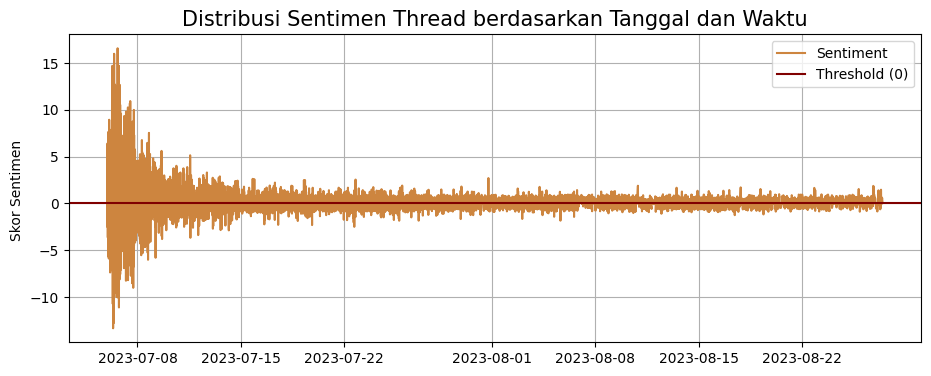

In [16]:
# Plot distribusi sentimen dari waktu ke waktu
vaders['review_date'] = pd.to_datetime(vaders['review_date'], dayfirst=True)
reviewbydate = vaders.groupby('review_date')['compound'].sum()

threshold = 0
plt.figure(figsize=(11, 4))
plt.plot(reviewbydate.index, reviewbydate.values, label='Sentiment', color='peru')
plt.axhline(y=threshold, color='maroon', linestyle='solid', label=f'Threshold ({threshold})')
plt.title("Distribusi Sentimen Thread berdasarkan Tanggal dan Waktu", size=15)
plt.xlabel('')
plt.ylabel('Skor Sentimen ')
plt.legend()
plt.grid(True)
plt.show()


Dalam minggu pertama setelah peluncuran, banyak pengguna meninggalkan ulasan tentang aplikasi tersebut, baik yang positif Alpha(> 0,05) maupun negatif Alpha(< -0,05). Namun, secara bertahap, pengguna memberikan ulasan yang lebih sedikit. Antusiasme seputar aplikasi Threads nampaknya perlahan-lahan meredup, seperti yang dapat kita lihat dalam waktu hanya beberapa hari, mulai dari tanggal 8 hingga 22 menunjukkan penurunan besar.

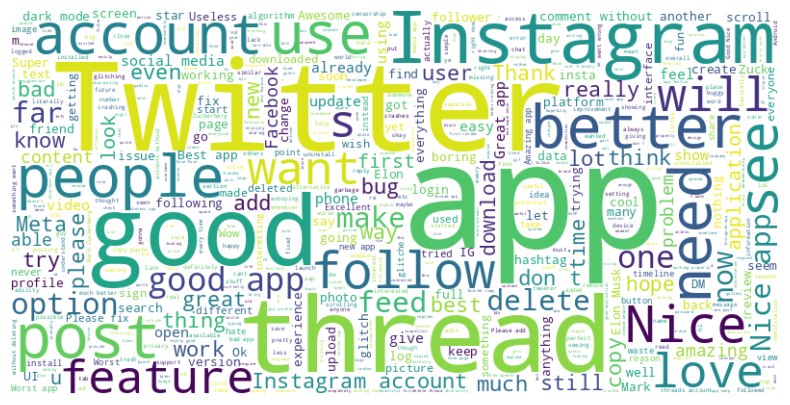

In [17]:
from wordcloud import WordCloud

word = ' '.join(vaders['review_description'])
word_cloud = WordCloud(width=800,
                          height=400,
                          max_words=1000,
                          background_color='white').generate(word)

plt.figure(figsize=(10,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()